In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
cars=pd.read_csv('/content/Cars 1.csv')

In [4]:
cars.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


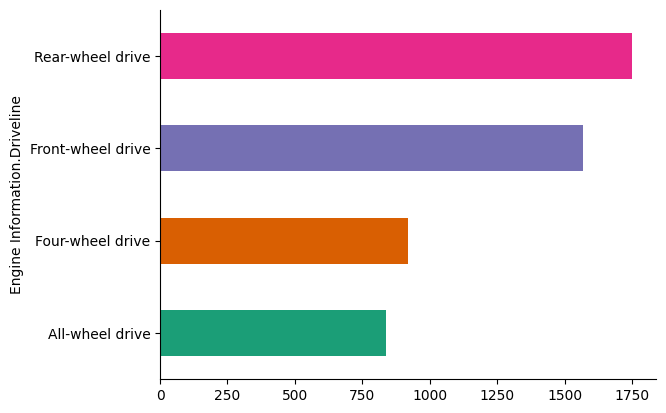

In [45]:
# @title Engine Information.Driveline

from matplotlib import pyplot as plt
import seaborn as sns
cars.groupby('Engine Information.Driveline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
electric_car=pd.read_csv('/content/Electric Car.csv')

In [6]:
electric_car.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


<ipython-input-49-6ade6299b54f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(electric_car, x='AccelSec', y='c', inner='stick', palette='Dark2')


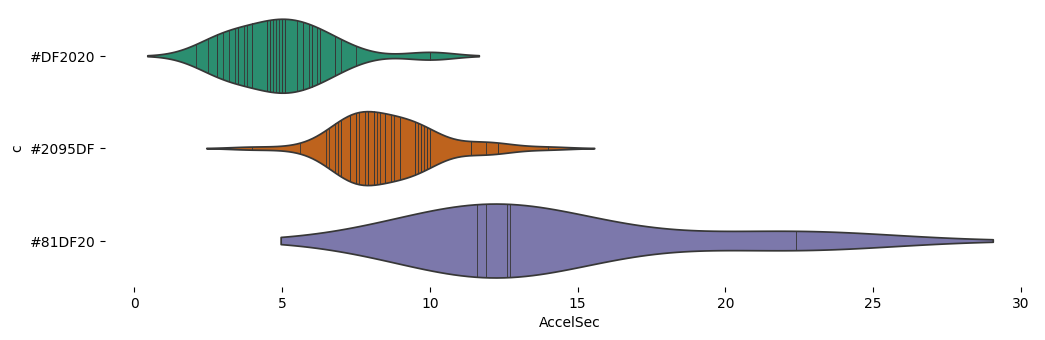

In [49]:
# @title c vs AccelSec

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(electric_car['c'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(electric_car, x='AccelSec', y='c', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

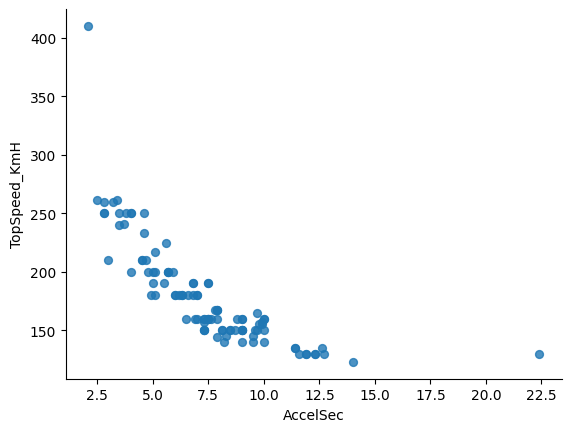

In [46]:
# @title AccelSec vs TopSpeed_KmH

from matplotlib import pyplot as plt
electric_car.plot(kind='scatter', x='AccelSec', y='TopSpeed_KmH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
electric_car.sort_values('TopSpeed_KmH',ascending=False).head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
51,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000
59,Tesla,Model S Performance,2.5,261,505,188,550,Yes,AWD,Type 2,Liftback,F,5,96990
24,Tesla,Model 3 Long Range Performance,3.4,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480
16,Porsche,Taycan Turbo S,2.8,260,375,223,780,Yes,AWD,Type 2 CCS,Sedan,F,4,180781
79,Porsche,Taycan Turbo,3.2,260,390,215,810,Yes,AWD,Type 2 CCS,Sedan,F,4,148301


In [8]:

cars1=cars['Engine Information.Engine Type'].str.split(' ',n=1,expand=True)
cars["Brand"]=cars1[0]

In [9]:
df=cars.pop('Brand')

In [10]:
cars.insert(0,'Brand',df)

In [11]:
cars.head(5)

,Brand,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,Audi,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,Audi,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,Audi,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,Audi,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,Audi,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [12]:
cars['top_speed']=cars['Engine Information.Engine Statistics.Horsepower']*0.5

In [13]:
cars.sort_values('top_speed',ascending=False).head(10)

,Brand,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,top_speed
1317,Chevrolet,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,21,Manual transmission,2012 Chevrolet Corvette ZR1 3ZR,Chevrolet,2012 Chevrolet Corvette ZR1,2012,638,604,319.0
1316,Chevrolet,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,21,Manual transmission,2012 Chevrolet Corvette ZR1 1ZR,Chevrolet,2012 Chevrolet Corvette ZR1,2012,638,604,319.0
1321,Chevrolet,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,20,Manual transmission,2010 Chevrolet Corvette ZR1 3ZR,Chevrolet,2010 Chevrolet Corvette ZR1,2010,638,604,319.0
1319,Chevrolet,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,20,Manual transmission,2011 Chevrolet Corvette ZR1 3ZR,Chevrolet,2011 Chevrolet Corvette ZR1,2011,638,604,319.0
1318,Chevrolet,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,20,Manual transmission,2011 Chevrolet Corvette ZR1 1ZR,Chevrolet,2011 Chevrolet Corvette ZR1,2011,638,604,319.0
1320,Chevrolet,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,20,Manual transmission,2010 Chevrolet Corvette ZR1 1ZR,Chevrolet,2010 Chevrolet Corvette ZR1,2010,638,604,319.0
358,Maybach,38,20,189,Rear-wheel drive,Maybach 6.0L 12 Cylinder 631 hp 738 ft-lbs Turbo,True,5,5 Speed Automatic Select Shift,10,Gasoline,16,Automatic transmission,2010 Maybach 62 Zeppelin,Maybach,2010 Maybach 62,2010,631,738,315.5
351,Maybach,38,95,189,Rear-wheel drive,Maybach 6.0L 12 Cylinder 631 hp 738 ft-lbs Turbo,True,5,5 Speed Automatic Select Shift,10,Gasoline,16,Automatic transmission,2010 Maybach 57 Zeppelin,Maybach,2010 Maybach 57,2010,631,738,315.5
354,Maybach,38,95,189,Rear-wheel drive,Maybach 6.0L 12 Cylinder 631 hp 738 ft-lbs Turbo,True,5,5 Speed Automatic Select Shift,10,Gasoline,16,Automatic transmission,2010 Maybach 57 Zeppelin,Maybach,2010 Maybach 57,2011,631,738,315.5
1138,Mercedes-AMG,137,200,79,Rear-wheel drive,Mercedes-AMG 6.0L 12 Cylinder 621hp 738ft-lbs ...,True,5,5 Speed Automatic Select Shift,12,Gasoline,18,Automatic transmission,2011 Mercedes-Benz CL65 AMG,AMG,2011 Mercedes-Benz CL-Class,2011,621,738,310.5


In [14]:
def discover(df, target=''):

    #Creating Seris with Feature Types, removing the target feature
    if target != '':
        df1 = df.drop(target, axis = 1, inplace = False)
    else:
        df1 = df

    #listing feature type
    feature_type = []
    for j in range(len(df1.columns)):
        if df1[df1.columns[j]].nunique()==2:
            feature_type.append('Binary')
        elif df1[df1.columns[j]].dtypes != 'O' and df1[df1.columns[j]].nunique()>10:
            feature_type.append('Numerical')
        elif df1[df1.columns[j]].dtypes != 'O' and df1[df1.columns[j]].nunique()<10:
            feature_type.append('Ordinal')
        elif df1[df1.columns[j]].nunique()<10:
            feature_type.append('Ordinal')
        else:
            feature_type.append('Identifier')

    #listing feature content
    features_content = []
    for i in range(len(df1.columns)):
        if df1[df1.columns[i]].nunique()<10:
            features_content.append(df1[df1.columns[i]].unique())
        else:
            features_content.append('n = ' + str(df1[df1.columns[i]].nunique()))

    #listing empty cells feature type
    num_of_empty = []
    for k in df1.columns:
        num_of_empty.append(df1[k].isnull().sum())
    #listing empty cells ratio feature type
    ratio_of_empty = []
    for k in df1.columns:
        ratio_of_empty.append(round(100*df1[k].isnull().sum()/df1[k].isnull().count(),2))

    discovered = pd.DataFrame({'Features': df1.columns,
                               'Features Content': features_content,
                               'Feature Type': feature_type,
                               'Empty Cells': num_of_empty,
                               '% Empty': ratio_of_empty
                             })
    discovered = discovered.sort_values(['Feature Type','Empty Cells'],ascending=False)
    print("Shape of Dataset: ",df.shape)
    return discovered

In [15]:
discover(electric_car)

Shape of Dataset:  (103, 14)


,Features,Features Content,Feature Type,Empty Cells,% Empty
8,PowerTrain,"[AWD, RWD, FWD]",Ordinal,0,0.0
9,PlugType,"[Type 2 CCS, Type 2 CHAdeMO, Type 2, Type 1 CH...",Ordinal,0,0.0
10,BodyStyle,"[Sedan, Hatchback, Liftback, SUV, Pickup, MPV,...",Ordinal,0,0.0
11,Segment,"[D, C, B, F, A, E, N, S]",Ordinal,0,0.0
12,Seats,"[5, 4, 7, 6, 2]",Ordinal,0,0.0
2,AccelSec,n = 55,Numerical,0,0.0
3,TopSpeed_KmH,n = 25,Numerical,0,0.0
4,Range_Km,n = 50,Numerical,0,0.0
5,Efficiency_WhKm,n = 54,Numerical,0,0.0
13,PriceEuro,n = 87,Numerical,0,0.0


In [16]:
electric_car.replace({'PlugType':{'Type 2 CCS':3, 'Type 2 CHAdeMO':4, 'Type 2':2, 'Type 1 CHAdeMO':1},
                      'BodyStyle':{'Sedan':1, 'Hatchback':2, 'Liftback':3, 'SUV':4, 'Pickup':5, 'MPV':6, 'Cabrio':7,'SPV':8, 'Station':9},
                      'Segment':{'D':4, 'C':3, 'B':2, 'F':6, 'A':1, 'E':5, 'N':7, 'S':8},
                      'RapidCharge':{'Yes':1,'No':0},
                      'PowerTrain':{'AWD':3,'RWD':1,'FWD':2},
                     'FastCharge_KmH':{'-':0}},inplace=True)

In [17]:
X=electric_car.select_dtypes(include=('int','float'))

In [18]:
from scipy.stats import zscore
X = X.apply(zscore)

In [19]:
X

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,-0.931186,1.240881,0.886862,-0.957247,0.225877,1.075633,0.201008,-1.406354,0.224027,0.147109,-0.009761
1,0.867167,-0.442660,-0.548531,-0.753325,0.225877,-1.471268,0.201008,-0.805298,-0.367634,0.147109,-0.759866
2,-0.897883,0.710450,0.488142,-0.277506,0.225877,1.075633,0.201008,-0.204242,0.224027,0.147109,0.018501
3,-0.198524,0.018584,0.169166,0.572171,0.225877,-1.471268,0.201008,0.396814,0.224027,0.147109,0.359993
4,0.700653,-0.788593,-1.345971,-0.719338,0.225877,-1.471268,0.201008,-0.805298,-0.959295,-1.115578,-0.671638
...,...,...,...,...,...,...,...,...,...,...,...
98,0.034596,-0.442660,-0.070066,0.062365,0.225877,-0.197818,0.201008,-0.805298,-0.367634,0.147109,-0.318281
99,-0.964489,0.710450,-0.030194,2.339498,0.225877,1.075633,0.201008,0.396814,0.815688,0.147109,1.184579
100,-0.498249,0.479828,-0.109938,0.164326,0.225877,1.075633,0.201008,-0.805298,-0.367634,0.147109,-0.171087
101,-0.764672,0.479828,0.288782,1.455834,0.225877,1.075633,0.201008,-0.805298,-0.367634,0.147109,0.270498


In [25]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import the KMeans class


SyntaxError: invalid syntax (<ipython-input-28-9eccb2d167ad>, line 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

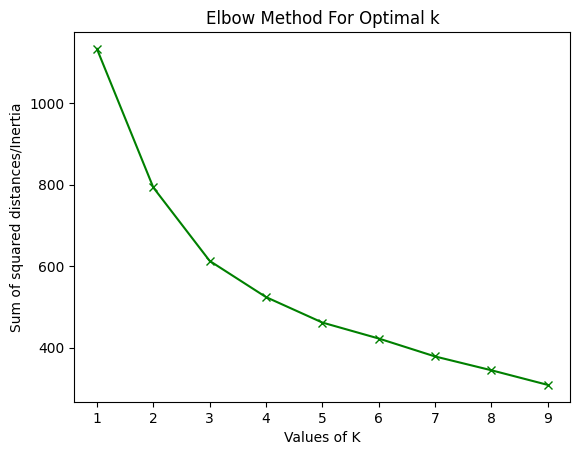

In [29]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
     kmeans = KMeans(n_clusters=num_clusters)
     kmeans.fit(X)
     Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'gx-') # Change 'bx-' to 'gx-' for a green line
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

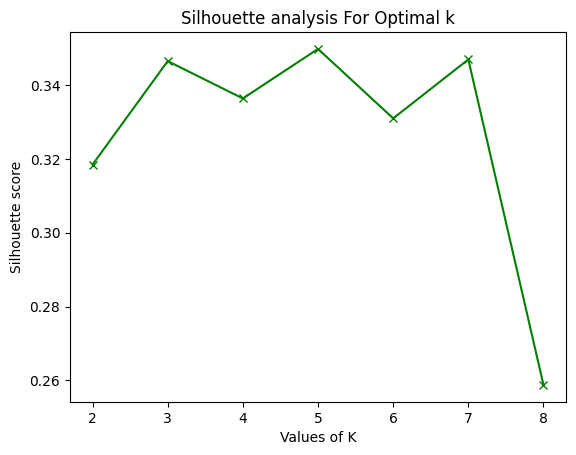

In [31]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'gx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [32]:
kmeans=KMeans(n_clusters=3,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
X['cluster']=kmeans.fit_predict(X)

In [33]:
centroids=kmeans.cluster_centers_

In [34]:
cen_X=[i[0] for i in centroids]
cen_y=[i[1]for i in centroids]

X['cen_X']=X.cluster.map({0:cen_X[0], 1:cen_X[1], 2:cen_X[2]})
X['cen_y']=X.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF']
X['c']=X.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

In [35]:
kmeans.cluster_centers_.shape


(3, 11)

In [36]:
cen_X,cen_y

([-0.7948031137192473, 2.2792074753753044, 0.3926016678452109],
 [0.8383904539230691, -1.11146376471251, -0.5295550043072567])

In [37]:
result=['cluster','cen_X','cen_y','c']
electric_car[result]=X[result]

Text(0, 0.5, 'Acclelration per 10 sec')

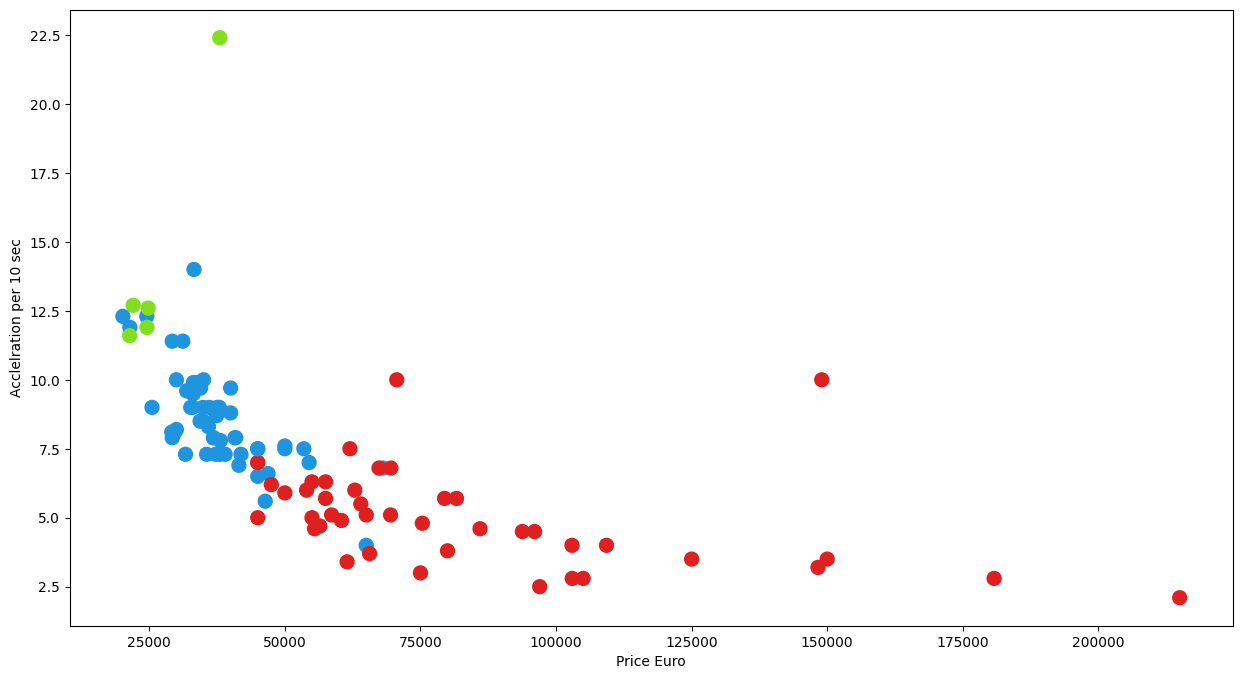

In [38]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(x=electric_car.PriceEuro,y=electric_car.AccelSec,c=electric_car.c,s=100)
plt.xlabel('Price Euro')
plt.ylabel('Acclelration per 10 sec')

In [39]:
data=X.groupby('cluster',as_index=False).sum()
data

,cluster,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,cen_X,cen_y,c
0,0,-33.381731,35.212399,28.516234,29.503080,9.486833,41.356221,-1.909572,5.246109,34.850554,13.754711,34.266669,-33.381731,35.212399,#DF2020#DF2020#DF2020#DF2020#DF2020#DF2020#DF2...
1,1,11.396037,-5.557319,-8.882943,-2.339168,-22.135944,-6.082888,-11.934824,2.585124,-4.204814,-9.365953,-4.365384,11.396037,-5.557319,#81DF20#81DF20#81DF20#81DF20#81DF20
2,2,21.985693,-29.655080,-19.633291,-27.163912,12.649111,-35.273333,13.844396,-7.831233,-30.645740,-4.388758,-29.901284,21.985693,-29.655080,#2095DF#2095DF#2095DF#2095DF#2095DF#2095DF#209...


<Axes: >

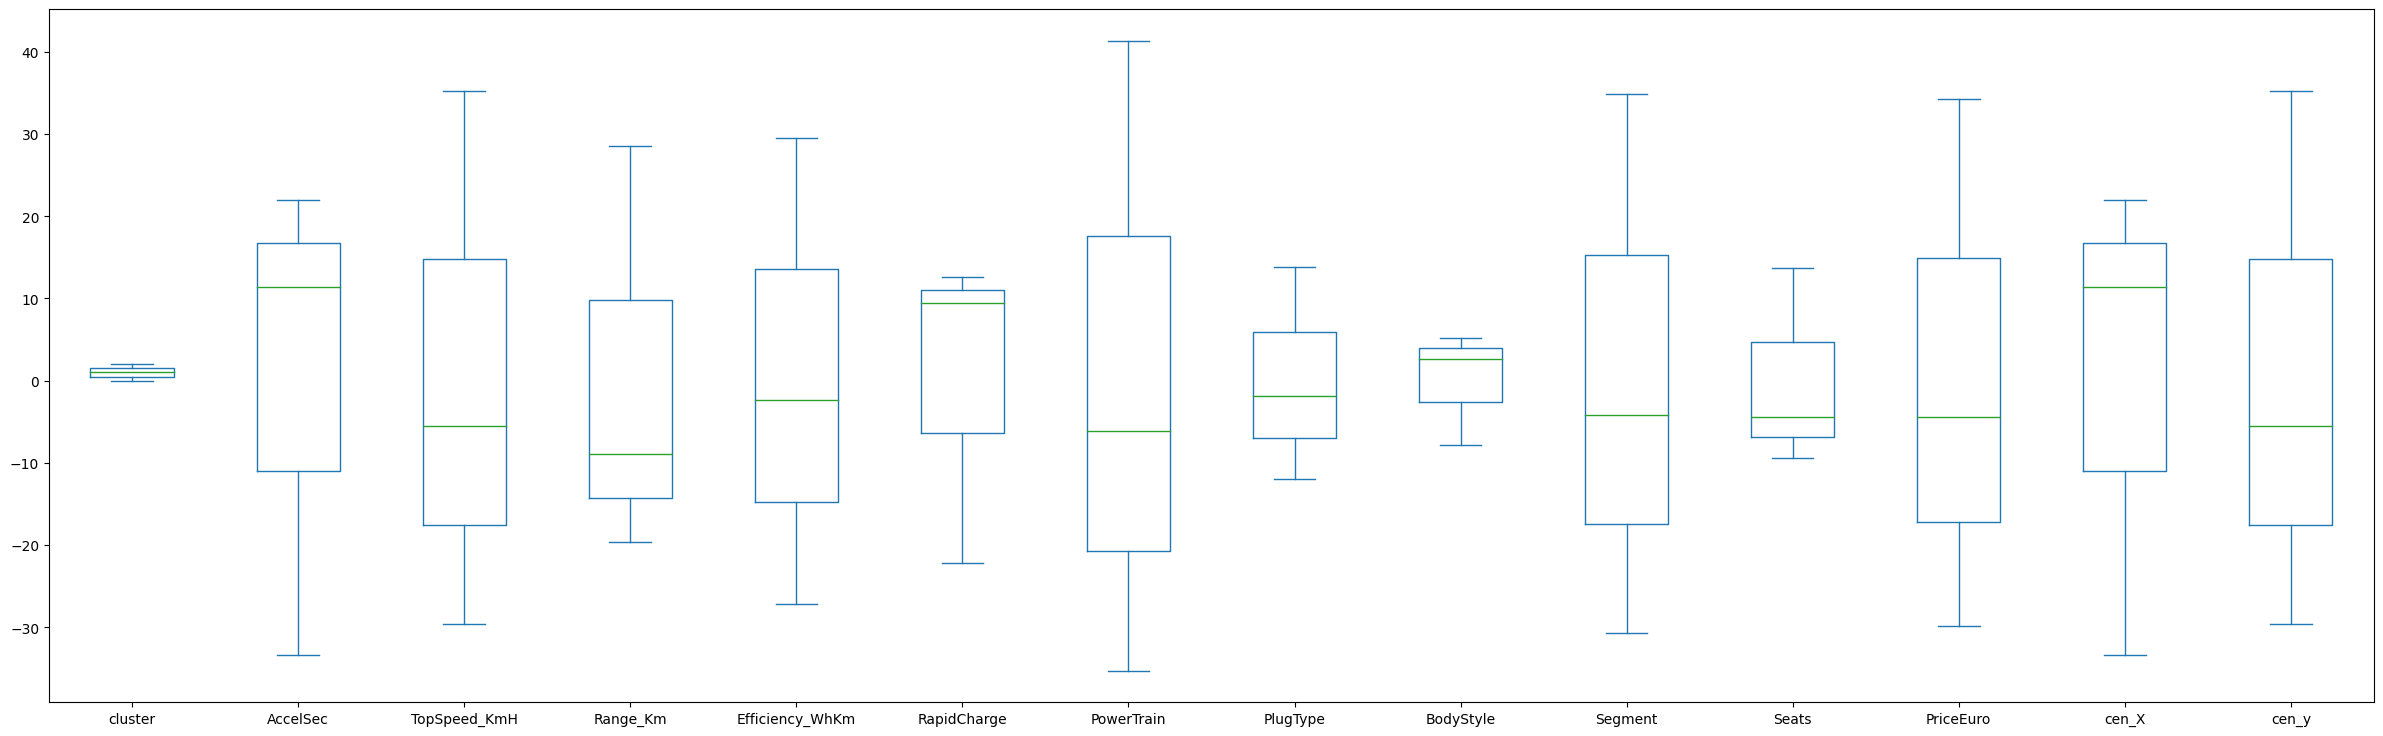

In [44]:
fig, ax = plt.subplots(figsize=(30,9))
data.plot(kind='box',ax=ax)